In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import os

# Create data frame
mycolumns = [
    'data','platform','lang',
    'metadata.read', 'metadata.write',
    'pixeldata.read','pixeldata.read.init','pixeldata.read.pixels',
    'pixeldata.write','pixeldata.write.init','pixeldata.write.pixels','pixeldata.write.close']
d = pd.DataFrame(columns=mycolumns)

# Read all CSV files into a data frame
meas_col = {'cpp': 'proc.real', 'java': 'real', 'jace': 'proc.real'}
for data in ['bbbc', 'mitocheck']:
    for platform in ['win', 'linux']:
        for lang in ['cpp', 'java', 'jace']:
   
            def get_filename(test):
                return 'results/' + data + '-' + test + '-' + platform + '-' + lang + '.tsv'

            if not os.path.exists(get_filename('pixeldata')):
                continue
            # Read pixels csv table
            pixel_table = pd.read_table(get_filename('pixeldata'), dtype={'test.name': str})
            c1 = pixel_table.groupby(['test.name']).mean()
            c1 = c1[meas_col[lang]]
            
            # Read metadat csv table
            metadata_table = pd.read_table(get_filename('metadata'), dtype={'test.name': str})
            c2 = metadata_table.groupby(['test.name']).mean()
            c2 = c2[meas_col[lang]]
            
            
            c = pd.concat([c1, c2]) 
            c['data'] =  data
            c['platform'] = platform
            c['lang'] = lang
            d.loc[len(d)] = c
            
d

,data,platform,lang,metadata.read,metadata.write,pixeldata.read,pixeldata.read.init,pixeldata.read.pixels,pixeldata.write,pixeldata.write.init,pixeldata.write.pixels,pixeldata.write.close
0,bbbc,win,cpp,3425.7,1504.8,20013.666667,8641.000000,11372.666667,1.051243e+05,2027.333333,1.016160e+05,1481.000000
1,bbbc,win,java,278.8,1490.4,197884.666667,2897.333333,194987.000000,6.213977e+05,11.000000,6.157453e+05,5640.333333
2,bbbc,linux,cpp,2403.0,1146.0,9656.666667,5856.666667,3800.000000,4.041333e+04,1876.666667,3.714333e+04,1393.333333
3,bbbc,linux,java,267.3,1315.7,105926.000000,1614.000000,104311.666667,1.387247e+05,9.666667,1.351310e+05,3583.000000
4,bbbc,linux,jace,291.0,1322.0,111820.000000,2780.000000,109040.000000,5.859260e+06,20.000000,5.859240e+06,NaN
5,mitocheck,win,cpp,78015.4,2599.3,71751.666667,71458.333333,293.333333,4.421333e+03,1748.666667,4.636667e+02,2209.000000
6,mitocheck,win,java,390.6,6764.0,2637.000000,942.666667,1694.000000,1.186100e+04,1.333333,1.015167e+04,1707.000000
7,mitocheck,linux,cpp,60320.0,1737.0,65113.333333,64973.333333,140.000000,3.743333e+03,1486.666667,4.333333e+02,1823.333333
8,mitocheck,linux,java,351.6,3947.5,1871.666667,771.666667,1099.666667,5.338333e+03,1.000000,4.106667e+03,1230.000000
9,mitocheck,linux,jace,391.0,3775.0,1946.666667,816.666667,1130.000000,8.183333e+03,3.333333,8.180000e+03,NaN


In [3]:
# d.columns = [c.replace('.', '_') for c in d.columns]
# d.groupby(['data', 'platform']).pixeldata_write.mean().unstack().plot(kind='bar', stacked=True)
# plt.show()

In [4]:
def create_single_barplot(column, title):
    f= plt.figure()
    ax = d[column].plot(kind='bar')
    ax.set_title(title)
    ax.set_xticklabels(d.data + ' ' + d.platform + ' ' + d.lang)
    ax.set_ylabel('Time (ms)')
    plt.show()

In [5]:
def create_split_barplot(column, title):
    f = plt.figure()
    st = f.suptitle(title)
    ax1 = plt.subplot(121)
    ax2 = plt.subplot(122)

    d[d['data'] == 'bbbc'][column].plot(kind='bar', ax=ax1)
    d[d['data'] == 'mitocheck'][column].plot(kind='bar', ax=ax2)
    ax1.set_title('BBBC')
    ax1.set_xticklabels(d.platform + ' ' + d.lang)
    ax1.set_ylabel('Time (ms)')
    ax2.set_title('Mitocheck')
    ax2.set_xticklabels(d.platform + ' ' + d.lang)
    ax2.set_ylabel('Time (ms)')
    f.tight_layout()

    # shift subplots down:
    st.set_y(0.95)
    f.subplots_adjust(top=0.85)
    plt.show()

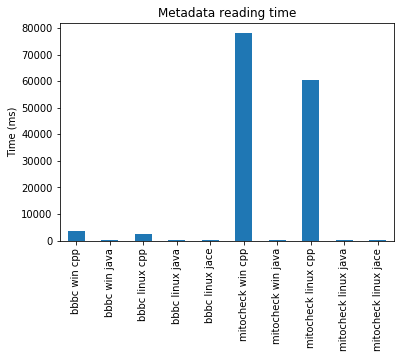

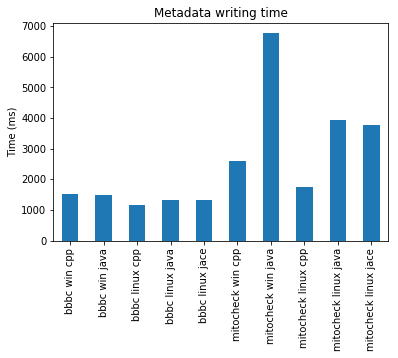

In [6]:
create_single_barplot('metadata.read','Metadata reading time')
create_single_barplot('metadata.write','Metadata writing time')

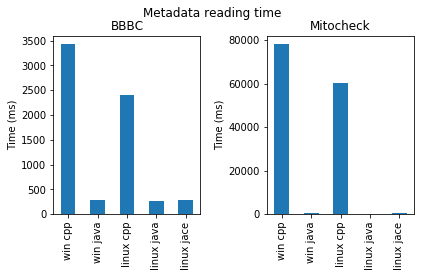

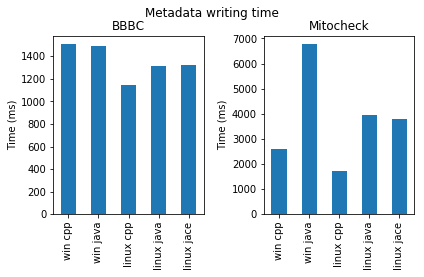

In [7]:
create_split_barplot('metadata.read', 'Metadata reading time')
create_split_barplot('metadata.write', 'Metadata writing time')

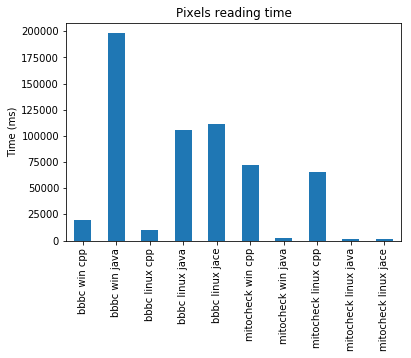

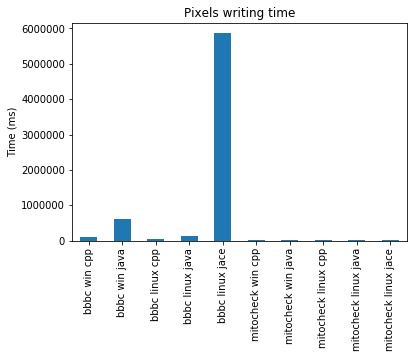

In [8]:
create_single_barplot('pixeldata.read','Pixels reading time')
create_single_barplot('pixeldata.write','Pixels writing time')

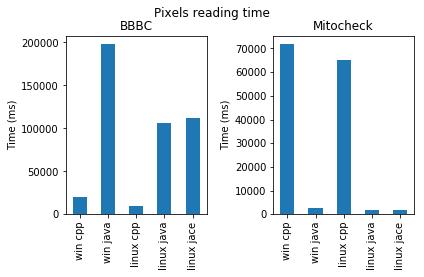

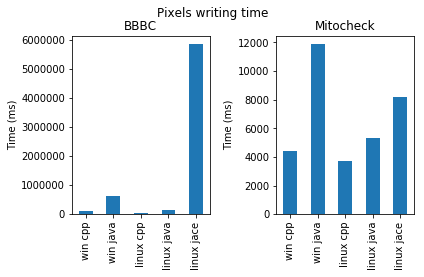

In [9]:
create_split_barplot('pixeldata.read','Pixels reading time')
create_split_barplot('pixeldata.write','Pixels writing time')

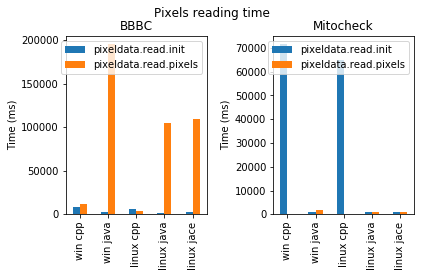

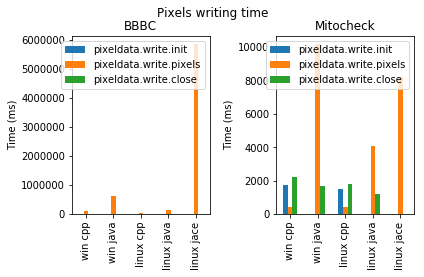

In [10]:
create_split_barplot(['pixeldata.read.init', 'pixeldata.read.pixels'],'Pixels reading time')
create_split_barplot(['pixeldata.write.init', 'pixeldata.write.pixels', 'pixeldata.write.close'],'Pixels writing time')